# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

In [255]:
import numpy as np
import pandas as pd
import seaborn as sns

In [256]:
c = pd.read_csv('input/demo01.csv')
c.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [257]:
c.shape

(16650, 16)

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [258]:
# tipos de variável e contagem de nulos
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [259]:
# percentual de variáveis faltantes no dataframe
pctg = (c.isna().sum() / len(c)) * 100
pctg

sexo                     0.0
posse_de_veiculo         0.0
posse_de_imovel          0.0
qtd_filhos               0.0
tipo_renda               0.0
educacao                 0.0
estado_civil             0.0
tipo_residencia          0.0
idade                    0.0
tempo_emprego            0.0
possui_celular           0.0
possui_fone_comercial    0.0
possui_fone              0.0
possui_email             0.0
qt_pessoas_residencia    0.0
mau                      0.0
dtype: float64

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    1. inicie uma lista vazia
    2. faça um for ao longo dos nomes das variáveis, 
    3. conte o número de categorias dessa variável 
    4. acumule essa informação de 3. na lista que você criou em 1. 
    5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [260]:
data_dict = {c[col].name: [c[col].dtypes.name] for col in c.columns}

df_meta = pd.DataFrame(data_dict)
df_meta = df_meta.transpose()


In [261]:
dict_type_clean = {k[0]: [v] for k, v in df_meta.value_counts().to_dict().items()}
df_type_clean = pd.DataFrame(dict_type_clean)
df_type_clean = df_type_clean.transpose().reset_index()
df_type_clean.columns = ['TYPE', 'QTD']

In [262]:
df_meta_type = df_meta.reset_index()
df_meta_type.columns = ['COL_NAME', 'TYPE']

In [263]:
df_type_clean

,TYPE,QTD
0,object,7
1,int64,5
2,float64,3
3,bool,1


In [264]:
df_meta_qtd = df_meta_type.merge(df_type_clean, on='TYPE')
df_meta_qtd

,COL_NAME,TYPE,QTD
0,sexo,object,7
1,posse_de_veiculo,object,7
2,posse_de_imovel,object,7
3,tipo_renda,object,7
4,educacao,object,7
5,estado_civil,object,7
6,tipo_residencia,object,7
7,qtd_filhos,int64,5
8,possui_celular,int64,5
9,possui_fone_comercial,int64,5


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [275]:
dict_tipo_renda = {'Working': 0, 'Commercial associate': 1, 'State servant': 2, 'Pensioner': 3, 'Student': 4}

dict_educacao = {
    'Secondary / secondary special': 0, 
    'Higher education': 1, 
    'Incomplete higher': 2, 
    'Lower secondary': 3, 
    'Academic degree': 4,
}

dict_estado_civil = {
    'Married': 0, 
    'Single / not married': 1, 
    'Civil marriage': 2, 
    'Widow': 3,
    'Separated': 4,
}

dict_residencia = {
    'House / apartment': 0,
    'Rented apartment': 1,
    'Municipal apartment': 2,
    'With parents': 3,
    'Co-op apartment': 4,
    'Office apartment': 5,
}

In [276]:
c_enc = c
c_enc = pd.get_dummies(c_enc, columns=['sexo'])
c_enc.posse_de_veiculo = c.posse_de_veiculo.map({'Y': 1, 'N': 0})
c_enc.posse_de_imovel = c.posse_de_imovel.map({'Y': 1, 'N': 0})
c_enc.tipo_renda = c.tipo_renda.map(dict_tipo_renda)
c_enc.educacao = c.educacao.map(dict_educacao)
c_enc.estado_civil = c.estado_civil.map(dict_estado_civil)
c_enc.tipo_residencia = c.tipo_residencia.map(dict_residencia)

In [281]:
# dados limpos
c_enc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   posse_de_veiculo       16650 non-null  int64  
 1   posse_de_imovel        16650 non-null  int64  
 2   qtd_filhos             16650 non-null  int64  
 3   tipo_renda             16650 non-null  int64  
 4   educacao               16650 non-null  int64  
 5   estado_civil           16650 non-null  int64  
 6   tipo_residencia        16650 non-null  int64  
 7   idade                  16650 non-null  float64
 8   tempo_emprego          16650 non-null  float64
 9   possui_celular         16650 non-null  int64  
 10  possui_fone_comercial  16650 non-null  int64  
 11  possui_fone            16650 non-null  int64  
 12  possui_email           16650 non-null  int64  
 13  qt_pessoas_residencia  16650 non-null  float64
 14  mau                    16650 non-null  bool   
 15  se

#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

<AxesSubplot:xlabel='possui_email', ylabel='count'>

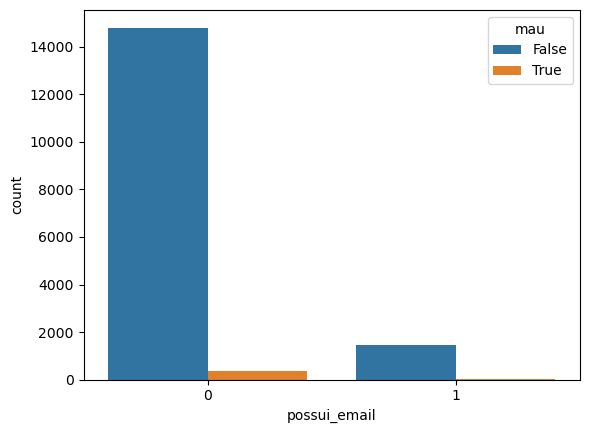

In [286]:
sns.countplot(
    x='possui_email',
    hue='mau',
    data=c_enc
)


<AxesSubplot:xlabel='posse_de_veiculo', ylabel='count'>

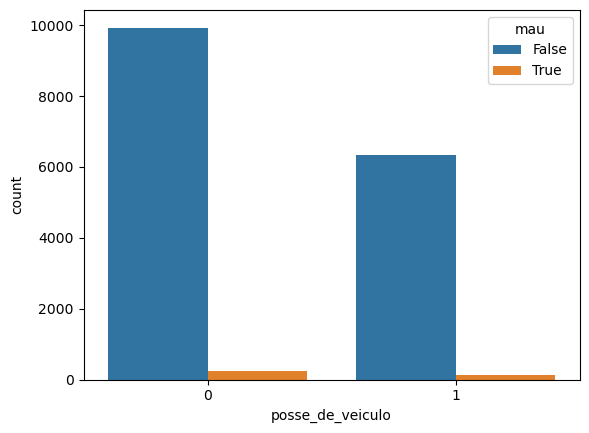

In [287]:
sns.countplot(
    x='posse_de_veiculo',
    hue='mau',
    data=c_enc
)

In [292]:
freq_veiculo = pd.crosstab(c_enc['posse_de_veiculo'], c_enc['mau'])
freq_email = pd.crosstab(c_enc['possui_email'], c_enc['mau'])

freq_veiculo_perc = freq_veiculo.div(freq_veiculo.sum(axis=1), axis=0)
freq_email_perc = freq_email.div(freq_email.sum(axis=1), axis=0)

In [293]:
freq_email

mau,False,True
possui_email,,
0,14810,360
1,1450,30


In [294]:
freq_veiculo

mau,False,True
posse_de_veiculo,,
0,9931,247
1,6329,143


In [295]:
freq_veiculo_perc

mau,False,True
posse_de_veiculo,,
0,0.975732,0.024268
1,0.977905,0.022095


In [296]:
freq_email_perc

mau,False,True
possui_email,,
0,0.976269,0.023731
1,0.979730,0.020270


#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [297]:
c_enc

,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_F,sexo_M
0,1,1,0,0,0,0,0,58.832877,3.106849,1,0,0,0,2.0,False,0,1
1,0,1,0,1,0,1,0,52.356164,8.358904,1,0,1,1,1.0,False,1,0
2,0,1,0,1,0,1,0,52.356164,8.358904,1,0,1,1,1.0,False,1,0
3,1,1,0,0,1,0,0,46.224658,2.106849,1,1,1,1,2.0,False,0,1
4,1,0,0,0,2,0,0,29.230137,3.021918,1,0,0,0,2.0,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,1,0,0,0,2,0,54.109589,9.884932,1,0,0,0,2.0,True,1,0
16646,0,1,0,1,0,0,0,43.389041,7.380822,1,1,1,0,2.0,True,1,0
16647,1,1,0,0,0,0,0,30.005479,9.800000,1,1,0,0,2.0,True,0,1
16648,1,1,0,0,0,0,0,30.005479,9.800000,1,1,0,0,2.0,True,0,1
